# Exoplanet Transit Analysis with Lightkurve
## Workshop on Astrophysics and Cosmology – SXPC-NEPAL  
**Session:** Exoplanet calculation and Analysis  
**Date:** December 19, 2025  
**Presenter/Facilitator:** Ramesh Neupane  

This notebook demonstrates how to:
- Access space-based photometric data
- Extract a light curve
- Identify an exoplanet transit signal using the `lightkurve` python package

---

## 1. Importing Libraries

In [11]:
import lightkurve as lk
%matplotlib inline

The `%matplotlib inline` ensures that the plot is rendered within the notebook.

## 2.Searching for and Downloading data
We search the public mission archive for Target Pixel Files (TPFs) of the exoplanet host star `TRAPPIST-1`. A TPF contains time-series images (pixel-level data) around the target star.

The search may return multiple observations (from different sectors or campaigns). For demonstration purposes, we select one dataset and download it locally.

In [12]:
data=lk.search_targetpixelfile ("Trappist-1")
print(data)
data=lk.search_targetpixelfile("Trappist-1")[1].download()

SearchResult containing 7 data products.

 #     mission     year   author  exptime  target_name  distance
                                     s                   arcsec 
--- -------------- ---- --------- ------- ------------- --------
  0 K2 Campaign 12 2016        K2      60 ktwo246199087      0.0
  1 K2 Campaign 12 2016        K2    1800 ktwo246199087      0.0
  2 K2 Campaign 19 2018        K2      60 ktwo246199087      0.0
  3 K2 Campaign 19 2018        K2    1800 ktwo246199087      0.0
  4 TESS Sector 70 2023      SPOC      20     278892590      0.0
  5 TESS Sector 70 2023      SPOC     120     278892590      0.0
  6 TESS Sector 70 2023 TESS-SPOC     200     278892590      0.0


## 3. Inspecting Target Pixel File
Before extracting a light curve, it is important to visually inspect the pixel-level data.

In [13]:
data.animate()

## 4. Lightcurve Extraction
We now convert the pixel-level data into a one-dimensional light curve, which represents the total flux from the target as a function of time.
we use the `PLD` (Pixel Level Decorrelation) method, which is effective at removing common instrumental trends. It has functions `.remove_outliers()`, `.flatten()`.

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

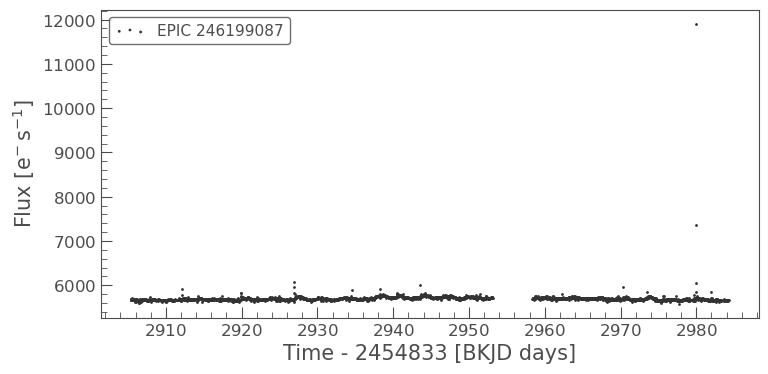

In [14]:
data.to_lightcurve(method="pld")
data.to_lightcurve(method="pld").scatter()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

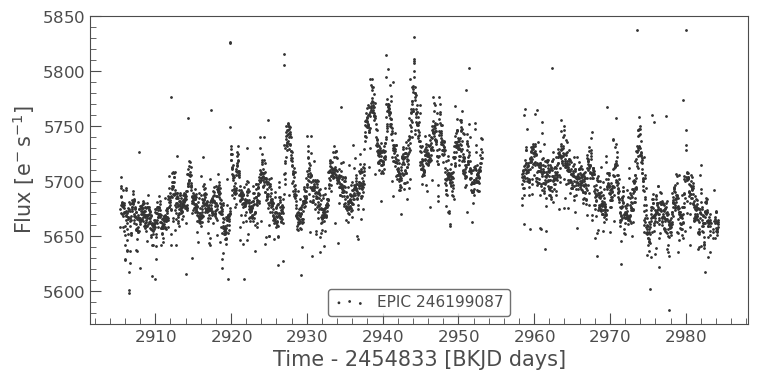

In [15]:
data.to_lightcurve(method="pld").remove_outliers().scatter()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

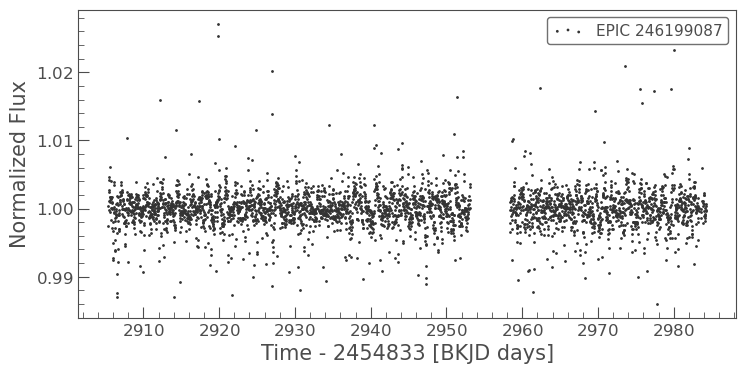

In [16]:
lc=data.to_lightcurve(method="pld").remove_outliers().flatten().scatter()
lc

## 5. Identifying Transit Parameters
Once the light curve is prepared, we identify key transit parameters:

* Transit time: The central time of a transit event.

* Transit duration: How long the planet takes to cross the stellar disk.

* Orbital period: The time between successive transits.

2906.511916793954
0.05 d
1.5110372927644626 d


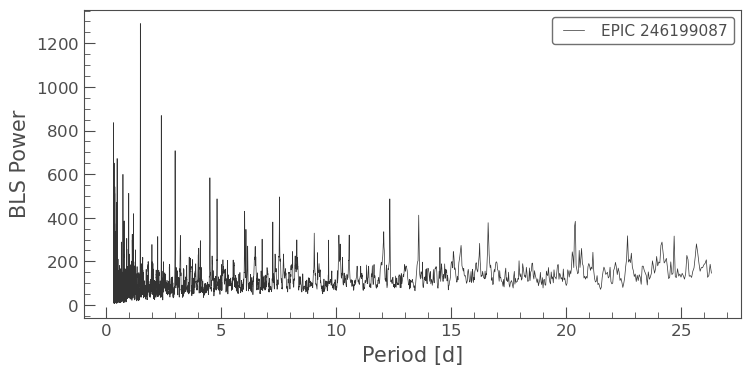

In [17]:
lc=data.to_lightcurve(method="pld").remove_outliers().flatten()
lc.to_periodogram("bls").plot();
period=lc.to_periodogram("bls").period_at_max_power
transit_time=lc.to_periodogram("bls").transit_time_at_max_power
duration=lc.to_periodogram("bls").duration_at_max_power
print(transit_time)
print(duration)
print(period)

## 6. Phase Folding the Light Curve
We fold the light curve on the orbital period. Phase folding stacks multiple transit events on top of each other, improving the signal-to-noise ratio.

The folded light curve clearly reveals the characteristic dip caused by the planet passing in front of the star.

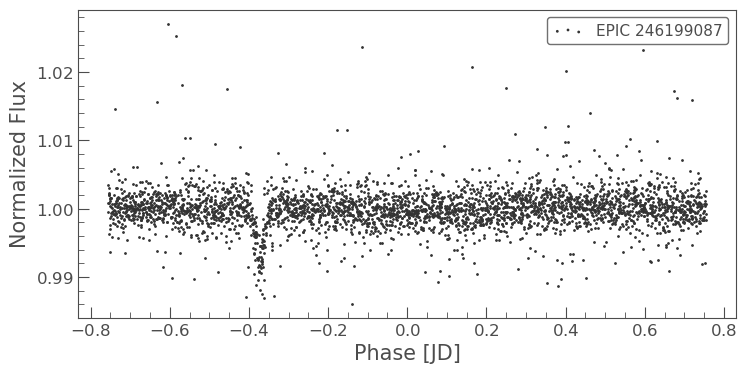

In [18]:
lc.fold(period).scatter();

## 7. Zooming into the Transit

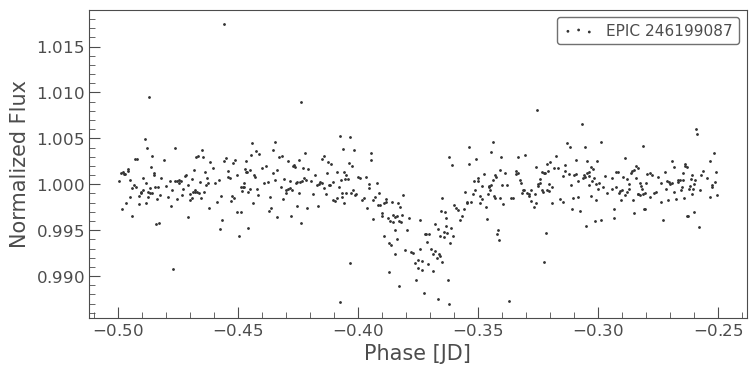

In [19]:
lc.fold(period).truncate(-0.5, -0.25).scatter();